# Circuit Decomposition

You may recall from your quantum mechanics course that quantum theory is unitary. The aim of a quantum computer essentially boils down to executing unitaries and as you have seen previously we also explored universality in quantum computing

**"A set of quantum gates is said to be universal if any unitary transformation of the quantum data can be efficiently approximated arbitrarily well as a sequence of gates in the set."** (https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html)

Every gate you run on the IBM Quantum Experience is transpiled into single qubit rotations and CNOT (CX) gates. We know that these constitute a universal gate set, which implies that any unitary can be implemented using only these gates. However, in general it is not easy to find a good decomposition for an arbitrary unitary. Your task is to find such a decomposition for given unitary.

First off let us import the required functions for checking circuit and supplying the unitary.

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import scipy
import numpy as np
from IPython.display import display, Math, Latex
import qiskit.quantum_info as qi
%matplotlib inline
%pip install -I git+https://github.com/mnp-club/MnP_QC_Workshop.git
from mnp_qc_workshop_2020.unitary_circuit import *

  Cloning https://github.com/mnp-club/MnP_QC_Workshop.git to /tmp/pip-req-build-vc10krle
  Running command git clone -q https://github.com/mnp-club/MnP_QC_Workshop.git /tmp/pip-req-build-vc10krle
  Created wheel for mnp-qc-workshop-2020: filename=mnp_qc_workshop_2020-0.1-py3-none-any.whl size=6878 sha256=bd93206489d6941ea7b691fd382179280e3a4a3fcbc8ff89ff6d51a65e9962ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-rqeiqhn9/wheels/8a/05/36/f117ccc148756e959adcc34f0e038da439d98f3d4d8b1e8133
Successfully built mnp-qc-workshop-2020
Note: you may need to restart the kernel to use updated packages.


<p>Now you can have a look at the unitary. We are just going to plot some graphs to give an idea of what it looks like.</p>

(16, 16)


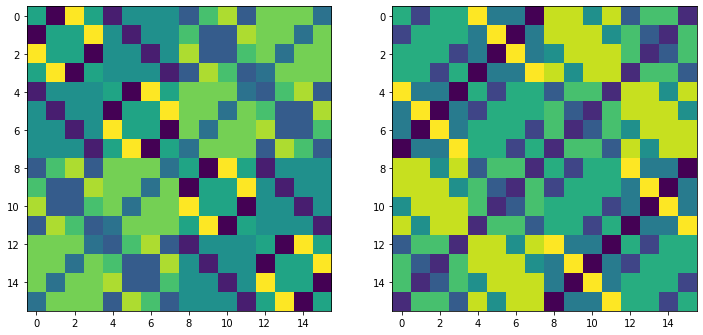

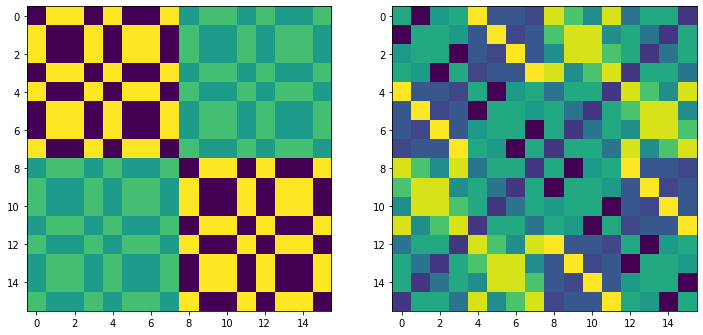

In [2]:
U = get_unitary()
print(U.shape)
fig, (ax1, ax2) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax1.imshow(np.real(U)) #plot real parts of each element
ax2.imshow(np.imag(U)) #plot imaginary parts of each element
fig, (ax3, ax4) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax3.imshow(np.abs(U)) #plot the absolute values of each element
ax4.imshow(np.angle(U)) #plot the phase angles of each element

<p>Although the unitary doesnt look all that pleasant, it is symmetric and also has some interesting properties which it would disclose if you happen to do some modifications to it. You might find it to show some cleaner shape if you happen to multiply certain things to it.</p>

## Your task

**Using only single qubit rotations and CNOT gates, find a quantum circuit that approximates that unitary $U$ by a unitary $V$ up to an error $\varepsilon = 0.01$, such that $\lVert U - V\rVert_2 \leq \varepsilon$ !** 

Note that the norm we are using here is the spectral norm, $\qquad \lVert A \rVert_2 = \max_{\lVert \psi \rVert_2= 1} \lVert A \psi \rVert$.

This can be seen as the largest scaling factor that the matrix $A$ has on any initial (normalized) state $\psi$. One can show that this norm corresponds to the largest singular value of $A$, i.e., the square root of the largest eigenvalue of the matrix $A^\dagger A$, where $A^{\dagger}$ denotes the conjugate transpose of $A$.

**When you submit a circuit, we remove the global phase of the corresponding unitary $V$ before comparing it with $U$ using the spectral norm. For example, if you submit a circuit that generates $V = \text{e}^{i\theta}U$, we remove the global phase $\text{e}^{i\theta}$ from $V$ before computing the norm, and you will have a successful submission. As a result, you do not have to worry about matching the desired unitary, $U$, up to a global phase.**

The cost function that we have defined is something like this
$$
\qquad \text{cost} = 10 \cdot n_{cx} + n_{u3}
$$

**Note that you will need to ensure that your circuit is composed only of $u3$ and $cx$ gates. The exercise is considered correctly solved if your cost is smaller than 1200.**

In the cell below you can go ahead and try to execute this in a circuit. Note that we have added a transpile function in the cell below since we are going to calculate the cost after your circuit has been transpiled into only CNOT gates and U3 gates. You can find the documentation for the transpile function <a href = "https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a>.

Another function that might come in handy for starting with is the <code>QuantumCircuit.unitary(obj, qubits[, label])</code> which simply applies the unitary gate <code>obj</code> to the given <code>qubits</code>.

In [5]:
qc = QuantumCircuit(4)
qc.unitary(U, range(4))
matrix = qi.Operator(qc).data
print(matrix)
#
#
#Your code here
#
#
# qc = transpile(qc,basis_gates=['cx','u3'],optimization_level=3)
# qc.draw('mpl')

[[ 0.08838835+0.03661165j -0.26516504-0.21338835j  0.33838835+0.03661165j
   0.08838835+0.03661165j -0.21338835+0.26516504j  0.03661165-0.08838835j
   0.03661165-0.08838835j  0.03661165-0.33838835j -0.08838835+0.21338835j
   0.16161165+0.21338835j  0.26516504-0.03661165j -0.08838835+0.21338835j
   0.21338835-0.16161165j  0.21338835+0.08838835j  0.21338835+0.08838835j
  -0.03661165-0.26516504j]
 [-0.26516504-0.21338835j  0.08838835+0.03661165j  0.08838835+0.03661165j
   0.33838835+0.03661165j  0.03661165-0.08838835j -0.21338835+0.26516504j
   0.03661165-0.33838835j  0.03661165-0.08838835j  0.16161165+0.21338835j
  -0.08838835+0.21338835j -0.08838835+0.21338835j  0.26516504-0.03661165j
   0.21338835+0.08838835j  0.21338835-0.16161165j -0.03661165-0.26516504j
   0.21338835+0.08838835j]
 [ 0.33838835+0.03661165j  0.08838835+0.03661165j  0.08838835+0.03661165j
  -0.26516504-0.21338835j  0.03661165-0.08838835j  0.03661165-0.33838835j
  -0.21338835+0.26516504j  0.03661165-0.08838835j  0.26516

In [ ]:
#Run this cell for getting your circuit checked
check_circuit(qc)